#### Understanding Regression

* In unsupervised learning problems, there is no historical data that tells you the correct grouping for data. Therefore, these problems are dealt with by looking at hidden structures in the data and grouping that data based on those hidden structures. This is in contrast with supervised learning problems, wherein historical data that has the correct grouping is available.
* Regression is a type of supervised learning. The objective of a regression model is to predict a continuous outcome based on data. This is as opposed to predicting which group a data point belongs to (called classification).

Regression problems

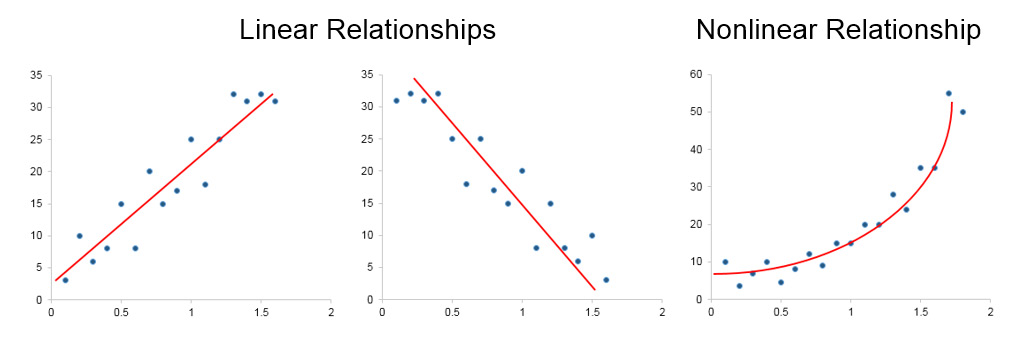

However, before we can perform regression, we need to transform the data and create features that will be useful for predicting our outcome.

####  Feature Engineering for Regression

* __Feature engineering__ is the process of taking data and transforming it for use in predictions. The idea is to create features that capture aspects of what's important to the outcome of interest. This process requires both data expertise and domain knowledge—you need to know what can be done with the data that you have, as well as knowledge of what might be predictive of the outcome you're interested in.
* Once the features are created, they need to be assessed. This can be done by simply looking for relationships between the features and the outcome of interest. Alternatively, you can test how much a feature impacts the performance of a model, to decide whether to include it or not.

#### Feature creation

Role of feature engineering in a machine learning workflow

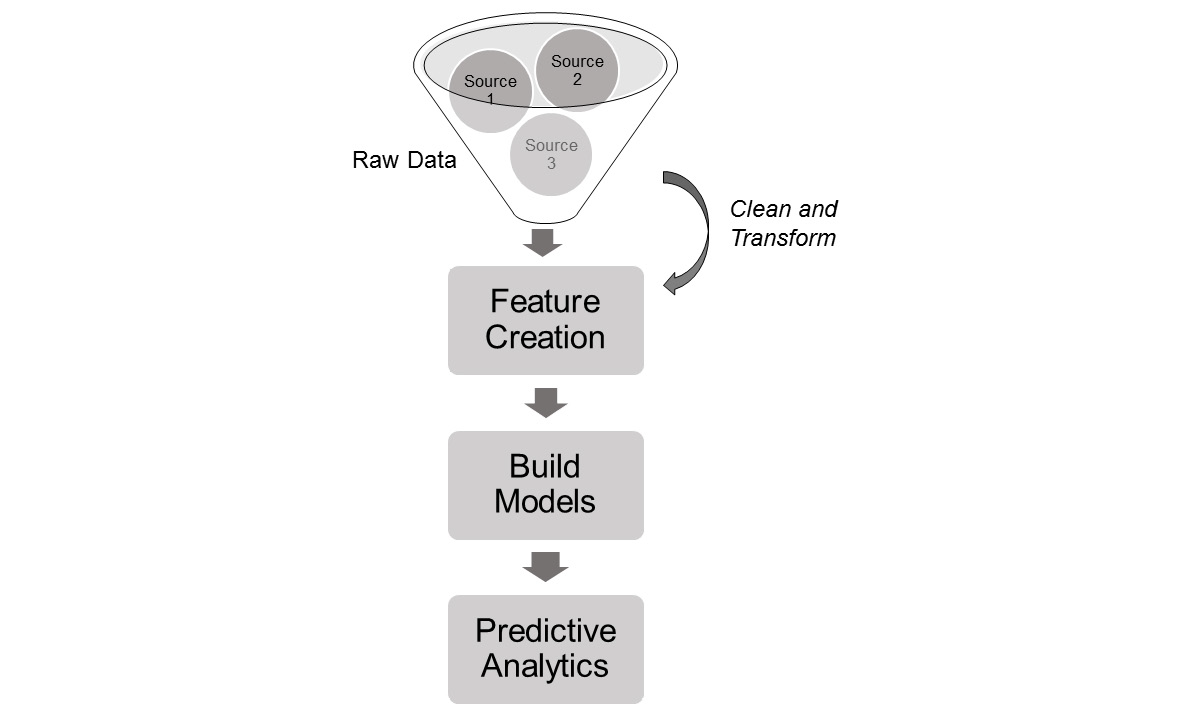

#### Data cleaning

Common problems with data:
* Data could be missing. - average or median method of the othe data points
* Outliers could be present. -Outliers are data points that lie far outside of the normal range of a variable, or in other words, far from the norm. A standard definition is that an outlier is any data point more than three standard deviations above the median. They are dangerous because they might not reflect normal behavior but can have a disproportionate effect on our model. Again, the easiest method of dealing with outliers is to simply remove them.


A histogram showing an outlier value

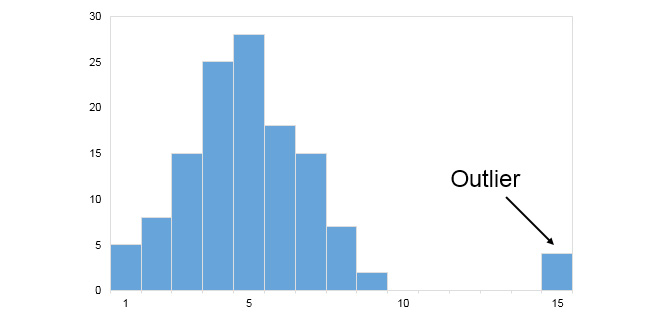

#### Creating features for transaction data

We have some historical transaction data from 2010 and 2011. For each transaction, we have a customer identifier (CustomerID), the number of units purchased (Quantity), the date of the purchase (InvoiceDate), and the unit cost (UnitPrice), as well as some other information about the item purchased. We want to prepare this data for a regression of customer transaction data from 2010 against the spend for 2011. We will therefore create features from the data for the year 2010 and compute the target (the amount of money spent) for 2011. When we create this model, it should generalize to future years for which we don't have the result yet.

In [2]:
import pandas as pd

df = pd.read_csv("data_science/retail_transactions.csv")
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,546729,22775,PURPLE DRAWERKNOB ACRYLIC EDWARDIAN,12,2011-03-16 11:36:00,1.25,18231.0,United Kingdom
1,559898,21868,POTTING SHED TEA MUG,6,2011-07-13 12:18:00,1.25,16225.0,United Kingdom
2,548648,71459,HANGING JAM JAR T-LIGHT HOLDER,24,2011-04-01 13:20:00,0.85,12949.0,United Kingdom
3,540543,22173,METAL 4 HOOK HANGER FRENCH CHATEAU,4,2011-01-09 15:23:00,2.95,14395.0,United Kingdom
4,561390,20726,LUNCH BAG WOODLAND,10,2011-07-27 09:52:00,1.65,17068.0,United Kingdom


In [3]:
df.dtypes

InvoiceNo        int64
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [4]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [5]:
df['revenue'] = df['UnitPrice'] * df['Quantity']

In [6]:
df.dtypes

InvoiceNo               int64
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
revenue               float64
dtype: object

You will observe that each invoice is spread over multiple rows, one for each type of product purchased. These can be combined such that data for each transaction is on a single row. To do so, we can perform a groupby operation on InvoiceNo. However, before that, we need to specify how to combine those rows that are grouped together.

In [7]:
len(df['InvoiceDate'].unique())

17282

In [8]:
len(df.index.unique())

397884

In [9]:
operations = {'revenue':'sum',                      # groupby.GroupBy.sum
              'InvoiceDate':'first',                # groupby.GroupBy.first     
              'CustomerID':'first'}

df = df.groupby('InvoiceNo').agg(operations)

In the preceding code snippet, we first specified the aggregation functions that we will use for each column, and then performed groupby and applied those
functions. InvoiceDate and CustomerID will be the same for all rows for the same invoice, so we can just take the first entry for them. For revenue, we sum the revenue across all items for the same invoice to get the total revenue for that invoice.

In [10]:
# aggregating by invoice number

df.tail()

,revenue,InvoiceDate,CustomerID
InvoiceNo,,,
581583,124.60,2011-12-09 12:23:00,13777.0
581584,140.64,2011-12-09 12:25:00,13777.0
581585,329.05,2011-12-09 12:31:00,15804.0
581586,339.20,2011-12-09 12:49:00,13113.0
581587,249.45,2011-12-09 12:50:00,12680.0


In [11]:
len(df.index.unique())

18532

In [12]:
len(df['InvoiceDate'].unique())

17254

In the preceding code snippet, we first specified the aggregation functions that we will use for each column, and then performed groupby and applied those
functions. InvoiceDate and CustomerID will be the same for all rows for the same invoice, so we can just take the first entry for them. For revenue, we sum the revenue across all items for the same invoice to get the total revenue for that invoice.

In [13]:
# use the year to decide which rows are being used for prediction

df['year'] = df['InvoiceDate'].apply(lambda x: x.year)

In [14]:
df.head()

,revenue,InvoiceDate,CustomerID,year
InvoiceNo,,,,
536365,139.12,2010-12-01 08:26:00,17850.0,2010
536366,22.20,2010-12-01 08:28:00,17850.0,2010
536367,278.73,2010-12-01 08:34:00,13047.0,2010
536368,70.05,2010-12-01 08:34:00,13047.0,2010
536369,17.85,2010-12-01 08:35:00,13047.0,2010


The dates of the transactions may also be an important 
source of features. The days since a customer's last
transaction as of the end of the year, or how early in the
year a customer had their first transaction, can tell us a bit
about the customer's purchasing history, which could be
important. Therefore, for each transaction, we'll calculate
how many days difference there is between the last day of
2010 and the invoice date:

In [15]:
import datetime as dt

df['days_since'] = (dt.datetime(year=2010, month=12, day=31) - df['InvoiceDate']).apply(lambda x: x.days)

In [16]:
df.head()

,revenue,InvoiceDate,CustomerID,year,days_since
InvoiceNo,,,,,
536365,139.12,2010-12-01 08:26:00,17850.0,2010,29
536366,22.20,2010-12-01 08:28:00,17850.0,2010,29
536367,278.73,2010-12-01 08:34:00,13047.0,2010,29
536368,70.05,2010-12-01 08:34:00,13047.0,2010,29
536369,17.85,2010-12-01 08:35:00,13047.0,2010,29


For __days_since__, we will calculate the maximum and minimum number of days (giving us features telling us how long this customer has been active in 2010, and how recently), as well as the number of
unique values (giving us how many separate days this customer made a purchase on). Since these are for our predictors, we will only apply these functions to our data from 2010

In [17]:
# aggregating by customer ID 
# groupby creates time-period e.g [2020.02,2020.04, etc]. Nuninque gets amount of purchases in quantity

operations = {'revenue': 'sum',
              'days_since': ['max', 'min', 'nunique'],}

X = df[df['year'] == 2010].groupby('CustomerID').agg(operations)
X.head()

revenue days_since            
                sum        max min nunique
CustomerID                                
12347.0      711.79         23  23       1
12348.0      892.80         14  14       1
12370.0     1868.02         16  13       2
12377.0     1001.52         10  10       1
12383.0      600.72          8   8       1

As you can see from the preceding figure, because we
performed multiple types of aggregations on the
days_since column, we ended up with multilevel
column labels. To simplify this, we can reset the names of
the columns to make them easier to reference later.

In [18]:
X.columns = [' '.join(col).strip() for col in X.columns.values]
X.head()

,revenue sum,days_since max,days_since min,days_since nunique
CustomerID,,,,
12347.0,711.79,23,23,1
12348.0,892.80,14,14,1
12370.0,1868.02,16,13,2
12377.0,1001.52,10,10,1
12383.0,600.72,8,8,1


We'll calculate one more feature: the average spend per
order. We can calculate this by dividing revenue sum by
days_since nunique (this is really the average spend
per day, not per order, but we're assuming that if two
orders were put in on the same day, we can treat them as
part of the same order for our purposes):

In [19]:
X['avg_order_cost'] = X['revenue sum'] / X['days_since nunique']

In [20]:
X.head()

,revenue sum,days_since max,days_since min,days_since nunique,avg_order_cost
CustomerID,,,,,
12347.0,711.79,23,23,1,711.79
12348.0,892.80,14,14,1,892.80
12370.0,1868.02,16,13,2,934.01
12377.0,1001.52,10,10,1,1001.52
12383.0,600.72,8,8,1,600.72


Now that we have our predictors, we need the outcome
that we'll be predicting, which is just the sum of revenue
for 2011.

In [21]:
y = df[df['year'] == 2011].groupby('CustomerID')['revenue'].sum()

In [22]:
y.head()

CustomerID
12346.0    77183.60
12347.0     3598.21
12348.0      904.44
12349.0     1757.55
12350.0      334.40
Name: revenue, dtype: float64

we can put our predictors and outcomes into a single
DataFrame, wrangled_df, and rename the columns to
have more intuitive names

In [23]:
wrangled_df = pd.concat([X,y], axis=1)

In [24]:
# after feature creation

wrangled_df.columns = ['2010 revenue', 'days_since_first_purchase', 'days_since_last_purchase', 'number_of_purchase',
                       'avg_order_cost', '2011 revenue']
wrangled_df.head()

,2010 revenue,days_since_first_purchase,days_since_last_purchase,number_of_purchase,avg_order_cost,2011 revenue
CustomerID,,,,,,
12346.0,NaN,NaN,NaN,NaN,NaN,77183.60
12347.0,711.79,23.0,23.0,1.0,711.79,3598.21
12348.0,892.80,14.0,14.0,1.0,892.80,904.44
12349.0,NaN,NaN,NaN,NaN,NaN,1757.55
12350.0,NaN,NaN,NaN,NaN,NaN,334.40


Note that many of the values in our DataFrame are NaN. This is caused by customers who were active either only in
2010 or only in 2011, so there is no data for the other year. In a future, we will work on predicting which of
our customers will churn, but for now, we'll just drop all customers not active in both years. Note that this means
that our model will predict the spend of customers in the next year assuming that they remain active customers.

In [25]:
wrangled_df = wrangled_df[~wrangled_df['2010 revenue'].isnull()]
wrangled_df = wrangled_df[~wrangled_df['2011 revenue'].isnull()]

In [26]:
wrangled_df.head()

,2010 revenue,days_since_first_purchase,days_since_last_purchase,number_of_purchase,avg_order_cost,2011 revenue
CustomerID,,,,,,
12347.0,711.79,23.0,23.0,1.0,711.79,3598.21
12348.0,892.80,14.0,14.0,1.0,892.80,904.44
12370.0,1868.02,16.0,13.0,2.0,934.01,1677.67
12377.0,1001.52,10.0,10.0,1.0,1001.52,626.60
12383.0,600.72,8.0,8.0,1.0,600.72,1249.84


it's often a good idea to get rid of outliers. A standard definition is that an outlier is any data point more than three standard deviations above the median, so we will use this to drop customers that are
outliers in terms of 2010 or 2011 revenue:

In [27]:
wrangled_df = wrangled_df[wrangled_df['2011 revenue'] < 
                          ((wrangled_df['2011 revenue'].median()) + 
                             wrangled_df['2011 revenue'].std()*3)]

In [28]:
wrangled_df = wrangled_df[wrangled_df['2010 revenue'] < 
                         ((wrangled_df['2010 revenue'].median()) + 
                           wrangled_df['2010 revenue'].std()*3)]

In [29]:
wrangled_df.to_csv('wrangled_transactions.csv')
wrangled_df.head()

,2010 revenue,days_since_first_purchase,days_since_last_purchase,number_of_purchase,avg_order_cost,2011 revenue
CustomerID,,,,,,
12347.0,711.79,23.0,23.0,1.0,711.79,3598.21
12348.0,892.80,14.0,14.0,1.0,892.80,904.44
12370.0,1868.02,16.0,13.0,2.0,934.01,1677.67
12377.0,1001.52,10.0,10.0,1.0,1001.52,626.60
12383.0,600.72,8.0,8.0,1.0,600.72,1249.84


#### Assessing features using visulations and correlations

Once we have our features of interest created, the next step is to assess those features, which can be done in the following sequence:

* First, we should do a sanity check of our features to make sure their values are what we would expect. We can plot a histogram of each feature to make sure the distribution of the feature is also what we would expect. This can often reveal unexpected problems with our data.
* The next step is to examine the relationships between our features and the outcome of interest. This can be done in the following two ways:
    *  Creating scatterplots: Often, the most effective means of assessing a relationship is to create a scatterplot that plots a feature against the outcome of interest and see whether there is any obvious relationship.
    * Assessing correlations: Another quick and effective method for assessing a relationship is to see whether there is a correlation between the variables. Correlations are linear relationships between two variables. They can be positive (as one variable increases, the other increases) or negative (as one increases, the other decreases). Correlation can be calculated easily using statistical packages, resulting in a single number that can often reveal whether there is a strong relationship between two variables. The following figure illustrates the different correlations, from perfect positive to perfect negative correlation:

A visualization of the different correlations

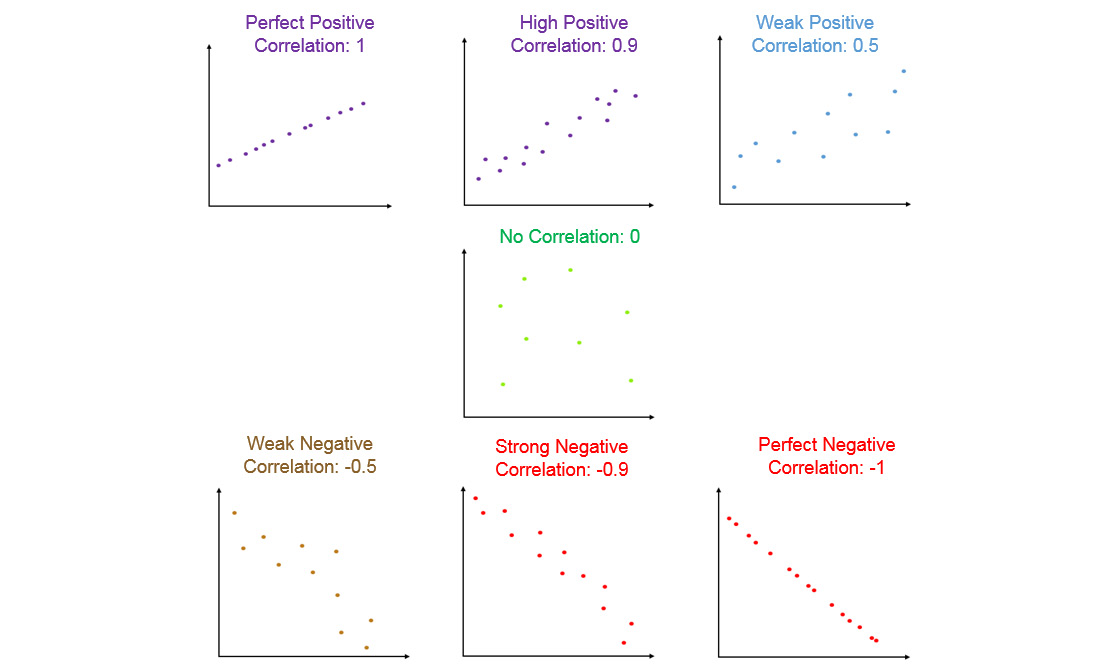

In [30]:
df = pd.read_csv('wrangled_transactions.csv', index_col='CustomerID')

__pairplot__ function will plot the histograms and pairwise scatterplots of all of our variables in one line, allowing us to examine both the distributions of our data and the relationships between the data points easily.

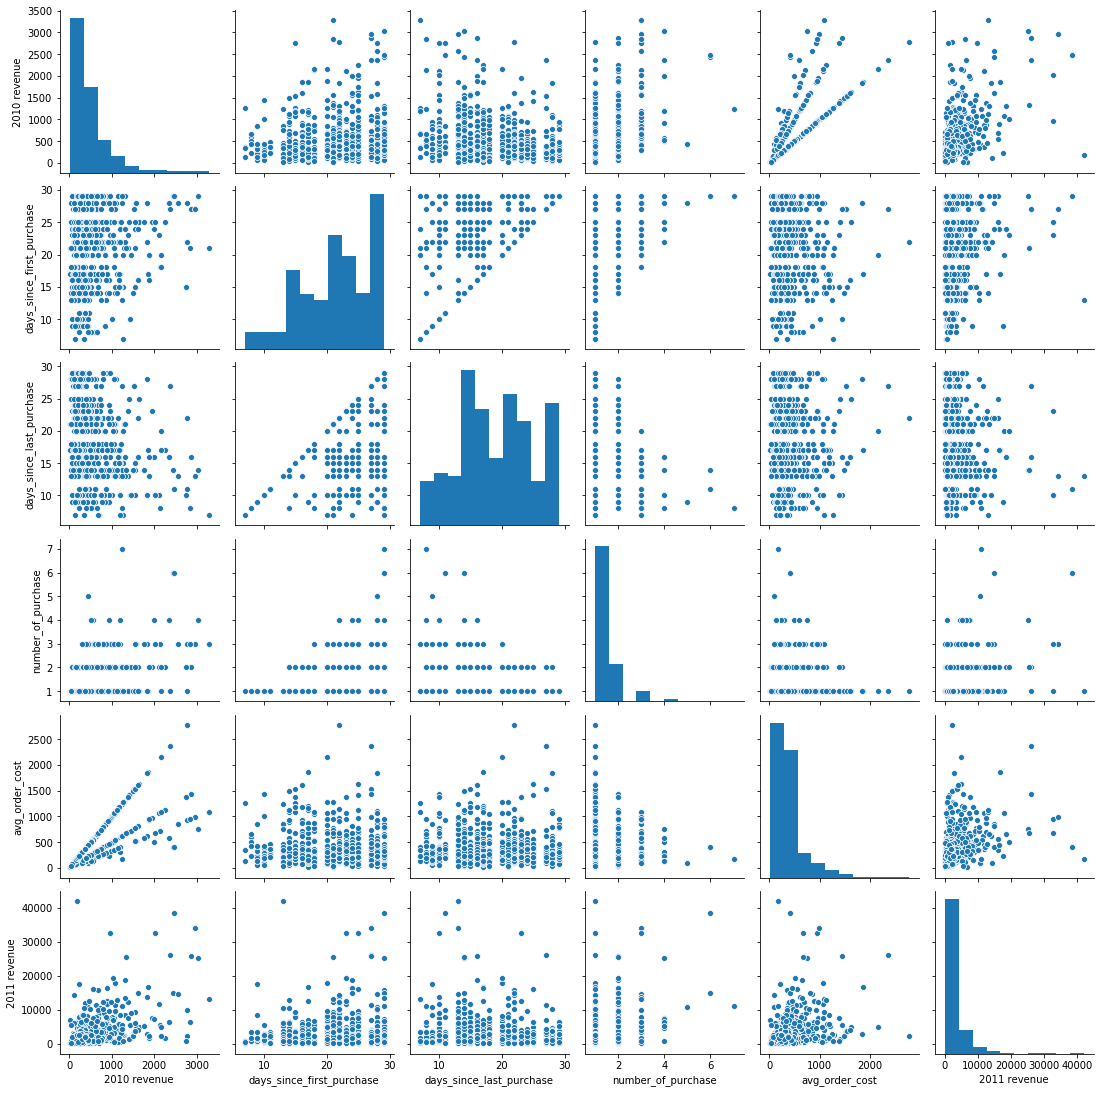

In [31]:
import seaborn as sns
%matplotlib inline

sns.pairplot(df);

In the preceding plot, the diagonal shows a histogram for each variable, whereas each row shows the scatterplot between one variable and each other variable. The bottom row of figures shows the scatterplots of the 2011 revenue (our outcome of interest) against each of our other variables. Because the datapoints are overlapping and there is a fair amount of variance, the relationships don't look very clear-cut in the visualizations.

In [32]:
# The correlations between each variable and each other variable in the dataset.

df.corr()

,2010 revenue,days_since_first_purchase,days_since_last_purchase,number_of_purchase,avg_order_cost,2011 revenue
2010 revenue,1.000000,0.109692,-0.254964,0.504438,0.779401,0.548234
days_since_first_purchase,0.109692,1.000000,0.641574,0.327502,-0.074321,0.061743
days_since_last_purchase,-0.254964,0.641574,1.000000,-0.398268,-0.054051,-0.171294
number_of_purchase,0.504438,0.327502,-0.398268,1.000000,-0.012466,0.355751
avg_order_cost,0.779401,-0.074321,-0.054051,-0.012466,1.000000,0.357384
2011 revenue,0.548234,0.061743,-0.171294,0.355751,0.357384,1.000000


Again, we can look at the last row to see the relationships between our predictors and outcome of interest (2011 revenue). Positive numbers indicate a positive relationship — for instance, the higher the 2010 revenue from a customer, the greater the expected revenue from them in 2011 should be. Negative numbers mean the reverse—for example, the more
days there have been since a customer's last purchase, the lower we would expect the 2011 revenue from them to be. Also, the higher the absolute number, the stronger the relationship.

#### Performing and Interpreting Linear Regression

Linear regression is a type of regression model that uses linear relationships between predictors and the outcome to predict
the outcome. Linear regression models can be thought of as a line running through the feature space that minimizes the
distance between the line and the data points. This is best visualized when there is a single predictor,
where it is equivalent to drawing a line of best fit on a scatterplot between the two variables but can be generalized
to many predictors:

A visualization of a linear regression line (red) fit to data (blue data points)

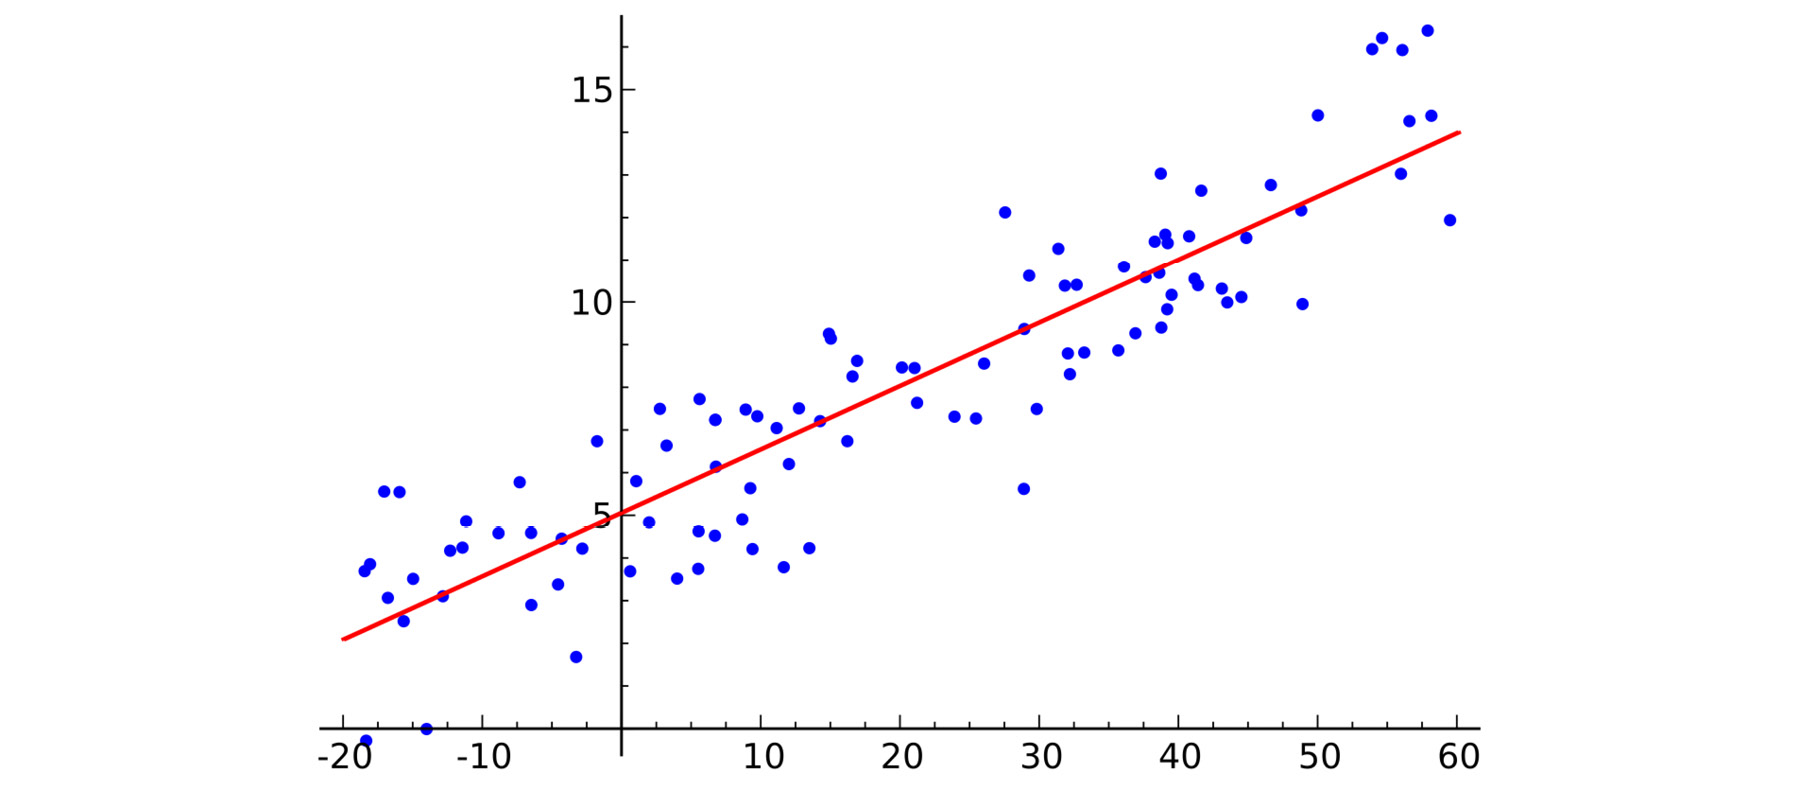

The line is generated by trying to find the line that best minimizes the error (difference) between the line and the data points.

* Y = a + b1X1 + b2X2 … biXi
* Here, Y is the predicted value of the outcome variable, a is the intercept (where the line crosses the xaxis), each X is the value of a variable, and each b is the respective weight assigned to that variable.

* Advantages: A big advantage of this simplicity is that it makes the model easy to interpret. By looking at the coefficients, we can easily see how much we would predict Y to change for each unit change in the predictor.
* Disadvantages: Linear regression models also have significant weaknesses that stem from their simplicity. They can only capture linear relationships, while relationships in the real world are often more complex. Linear models assume that, no matter how high the value of a predictor is, adding more to it will have the same effect as if the predictor was lower. In reality, this is often not the case. If a product appeals to customers in a middleincome range, we would expect that a boost in income for a customer with low income would increase sales to that customer, while a boost in income for a customer with high income could very well decrease sales to that customer. This would be a nonlinear relationship:

Some examples of linear and non-linear relationships

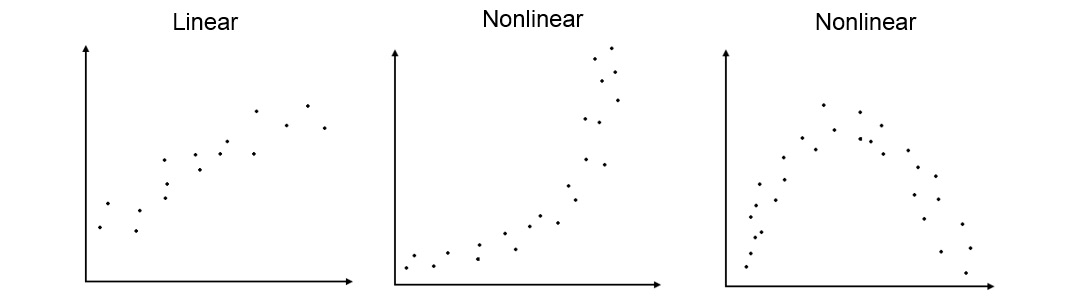

In addition to nonlinear relationships, linear models are unable to capture interactions between variables easily. In statistics, an interaction is a situation in which, when two variables are combined, their effect is larger than (or less than) the sum of their effect alone.For example, it could be
the case that while television advertisements and radio advertisements both have a positive effect on sales in an area, when both are done at once, the sum of their effect is less than the effect each would have alone due to saturating the market with ads. Linear models don't have a built-in way of dealing
with these kinds of effects, since they assume a simple linear relationship between the predictors and the outcome.

This does not mean that linear models are completely unable to account for nonlinear relationships or interactions. By performing transformations on predictors, a nonlinear relationship can be turned into a linear one, and interaction terms can be created by multiplying two predictors together;
they can then be added to the model. However, this can be difficult and time-consuming to do, and increases the complexity of the model, which makes it harder to interpret, thereby eliminating many of the benefits of using linear
models to begin with.

In [33]:
df = pd.read_csv('wrangled_transaction.csv', index_col='CustomerID')
df.head()

,2010 revenue,days_since_first_purchase,days_since_last_purchase,number_of_purchases,avg_order_cost,2011 revenue
CustomerID,,,,,,
12347.0,711.79,23.0,23.0,1.0,711.79,3598.21
12348.0,892.80,14.0,14.0,1.0,892.80,904.44
12370.0,1868.02,16.0,13.0,2.0,934.01,1677.67
12377.0,1001.52,10.0,10.0,1.0,1001.52,626.60
12383.0,600.72,8.0,8.0,1.0,600.72,1249.84


In [34]:
df.corr()

,2010 revenue,days_since_first_purchase,days_since_last_purchase,number_of_purchases,avg_order_cost,2011 revenue
2010 revenue,1.000000,0.109692,-0.254964,0.504438,0.779401,0.548234
days_since_first_purchase,0.109692,1.000000,0.641574,0.327502,-0.074321,0.061743
days_since_last_purchase,-0.254964,0.641574,1.000000,-0.398268,-0.054051,-0.171294
number_of_purchases,0.504438,0.327502,-0.398268,1.000000,-0.012466,0.355751
avg_order_cost,0.779401,-0.074321,-0.054051,-0.012466,1.000000,0.357384
2011 revenue,0.548234,0.061743,-0.171294,0.355751,0.357384,1.000000


There is only a weak relationship between __days_since_first_purchase and 2011 revenue__ —we will therefore not include that predictor in our model.

In [35]:
X = df[['2010 revenue', 'days_since_last_purchase', 'number_of_purchases', 'avg_order_cost']]
y = df['2011 revenue']

In [36]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 15)

In [37]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Examine the model coefficients by checking the coef_ property. Note that these are in the same order as our X columns: __2010 revenue, days_since_last_purchase, number_of_purchases, and avg_order_cost:__

In [38]:
model.coef_

array([  4.14982579,  -1.66976737, 394.96880445,  -0.49463827])

In [39]:
model.intercept_

538.7432547316507

2011 revenue = 538.74 + 4.14*(2010 revenue) – 1.66*(days_since_last_purchase) + 394.96*(number_of_purchases) – 0.49*(avg_order_cost)

We can now use the fitted model to make predictions about a customer outside of our dataset. Make a DataFrame that holds data for one customer, where 2010
revenue is 1,000, the number of days since the last purchase is 20, the number of purchases is 2, and the average order cost is 500. Have the model make a
prediction on this one customer's data:

In [40]:
single_customer = pd.DataFrame({'2010 revenue': [1000],
                               'days_since_last_purchase': [20],
                               'number_of_purchases': [2],
                               'avg_order_cost': [500]})
model.predict(single_customer)

array([5197.79217043])

5197.79217043, indicating the predicted 2011 revenue for a customer with this data.

We can plot the model's predictions on the test set against the true value. Make a scatterplot of the model predictions on X_test against y_test. Limit the x and y axes to a maximum value of 10,000 so that we get a better view of where most of the data points lie. Finally, add a line with slope 1, which will serve as our reference—if all of the points lie on this line, it means we have a perfect relationship between our predictions and the true answer:

In [41]:
import matplotlib.pyplot as plt
%matplotlib inline

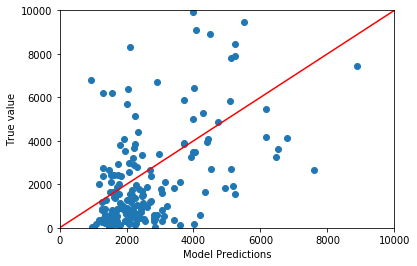

In [42]:
# The model predictions plotted against the true values

plt.scatter(model.predict(X_test), y_test)
plt.xlim(0, 10000)
plt.ylim(0, 10000)
plt.plot([0, 10000], [0, 10000], 'k-', color = 'r')
plt.xlabel('Model Predictions')
plt.ylabel('True value')
plt.show()

Since many of our points are quite far from the red line, this indicates that the model is not completely accurate. However, there does seem to be some relationship, with higher model predictions having higher true values.

To further examine the relationship, we can use correlation. From scipy, we can import the pearsonr function, which calculates the correlation between two
arrays, just like pandas did for the whole of our  DataFrame. We can use it to calculate the correlation between our model predictions and the true value as
follows:

In [43]:
from scipy.stats.stats import pearsonr

In [44]:
pearsonr(model.predict(X_test), y_test)

(0.6984179829690803, 2.178970099950275e-28)

The first number is the correlation, which is close to 0.7, indicating a strong relationship. The second number is the 2.18 value,
which indicates the probability that you would
see a relationship this strong if the two sets of numbers
were unrelated—the very low number here means that
this relationship is unlikely to be due to chance.

Note that R-squared is another common metric that is used to judge the fit of a model and is calculated by
simply squaring the correlation between the model's prediction and the actual result.

Pearson's r is usually used to express the correlation between two quantities. You could calculate Pearson's r to evaluate whether the two quantities are correlated. R^2 is usually used to evaluate the quality of fit of a model on data.

#### Evaluating the Accuracy of a Regression Model

The common metrics used to evaluate regression models rely on the concepts of residuals and errors, which are quantifications of how much a model mispredicts a particular data point.
We will first learn about residuals and errors. We will then
learn about two evaluation metrics, __mean absolute error (MAE) and root mean squared error (RMSE)__.

#### Residuals and Errors

An important concept in understanding how to evaluate
regression models is the residual. The residual refers to the
difference between the value predicted by the model and the
true value for a data point. It can be thought of as by how
much your model missed a particular value.

Estimating the residual

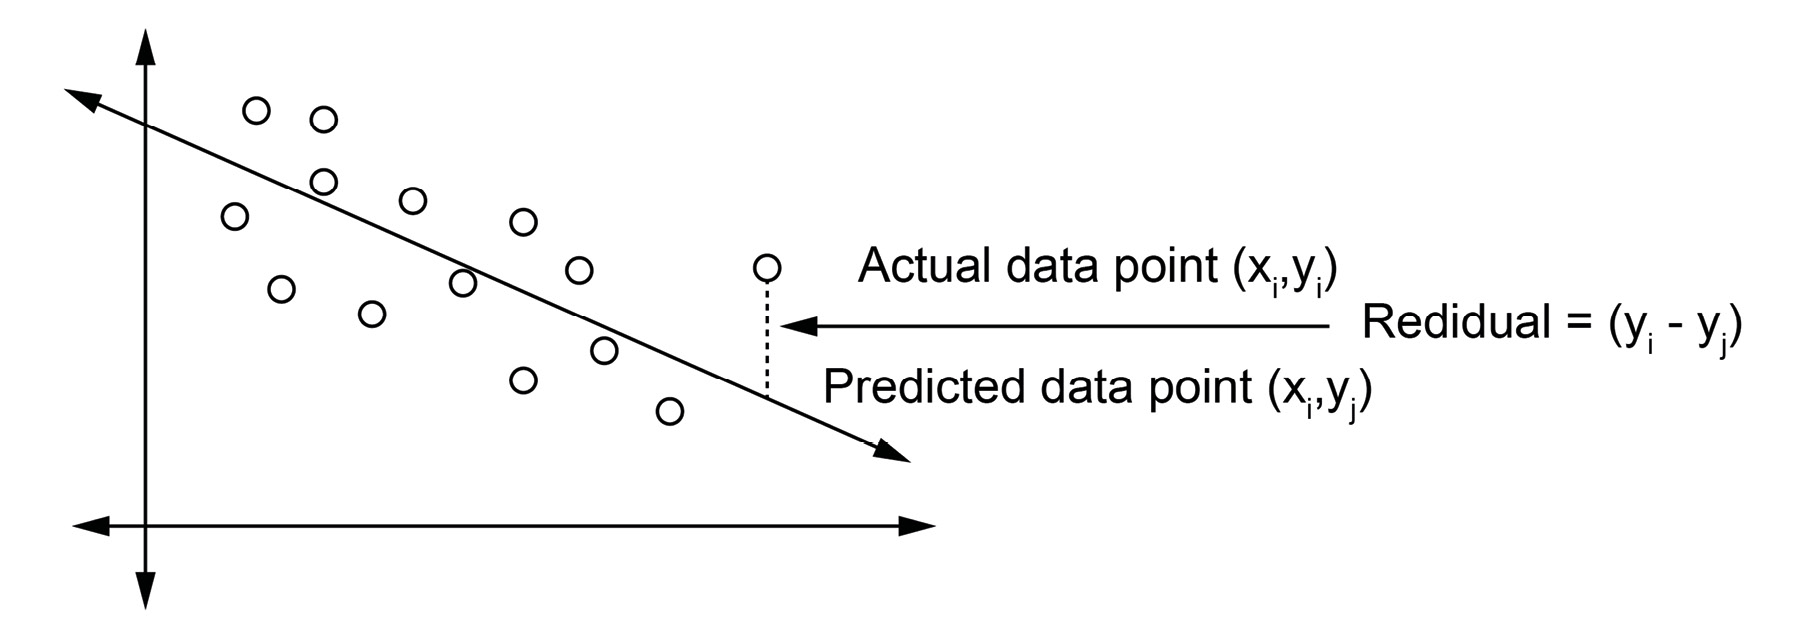

The residual is taken to be an estimate of the error of a model,
where the error is the difference between the true process
underlying the data generation and the model.

#### Mean Absolute Error

can intuitively be thought of as the
average difference you should expect between your model’s
predictions and the true value:

Equation for calculating the MAE of a model

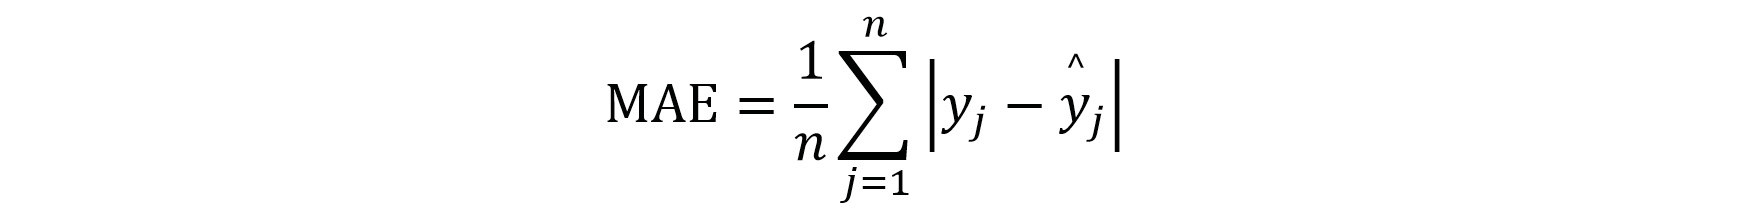

$y_j$ is the true value of the outcome variable for data point j, and $ŷ_j$ is the prediction of the model for that data point.

#### Root Mean Squared Error

One issue with the MAE is that it accounts for all errors equally. For many real world applications, small errors are okay and expected, whereas large errors could lead to larger issues. However, with MAE, two medium sized errors could add up and outweigh one large error. This means that the __MAE may prefer a model that is fairly accurate for most predictions__ but is occasionally __extremely inaccurate over a model with more consistent errors over all predictions.__ For this reason, instead of using the absolute error, a common technique is to use the squared error.

By squaring the error term, large errors are weighted more
heavily than small ones that add up to the same total amount
of error. If we then try to optimize the mean squared error
rather than the mean absolute error, we will end up with a
preference for models with more consistent predictions, since
those large errors are going to be penalized so heavily.

The MAE gives us an idea of how much we should expect the prediction to differ from the true value on average, while the mean squared error is more difficult to interpret. Therefore, it is common to take the route of the mean squared error, resulting in the __root mean squared
error (RMSE)__, as shown by the following equation:

Equation for calculating the RMSE of a model

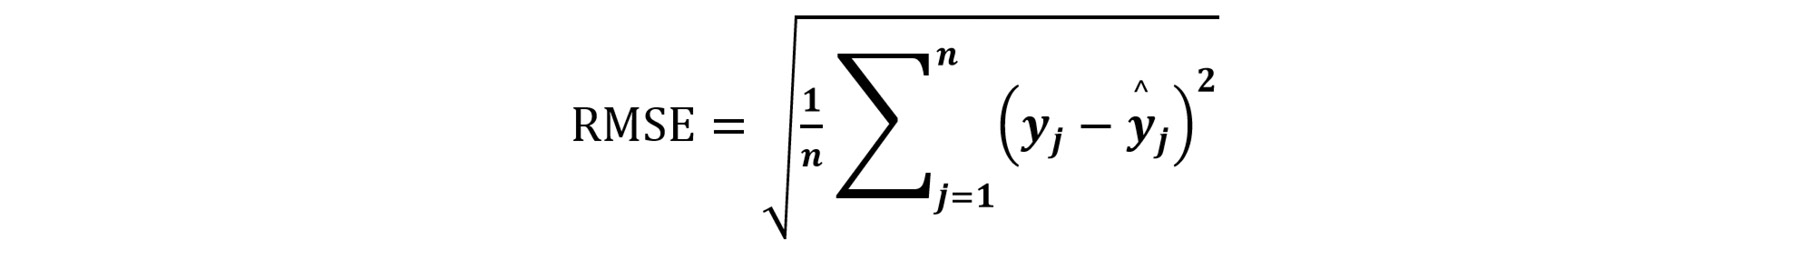

### Evaluating regression models of location revenue using MAE and RMSE

We will compare models built using all of the predictors to a model built excluding one of the predictors:

In [67]:
df = pd.read_csv('data_science/location_rev.csv')
df.head()

,revenue,num_competitors,median_income,num_loyalty_members,population_density,location_age
0,42247.80,3.0,30527.57,1407.0,3302.0,12.0
1,38628.37,3.0,30185.49,1025.0,4422.0,11.0
2,39715.16,1.0,32182.24,1498.0,3260.0,12.0
3,35593.30,5.0,29728.65,2340.0,4325.0,10.0
4,35128.18,4.0,30691.17,847.0,3774.0,11.0


In [68]:
X = df[['num_competitors', 'median_income', 'num_loyalty_members', 'population_density', 'location_age']]
y = df['revenue']

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=15)

In [70]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [71]:
predictions = model.predict(X_test)

In [72]:
error = predictions - y_test

In [73]:
error

825     1155.480236
374     4005.881725
488    -9809.280710
608     2001.875984
42      7599.294749
           ...     
827     4157.026597
690     1618.410890
907      217.847355
299    -4339.606107
811    11049.570413
Name: revenue, Length: 250, dtype: float64

In [74]:
# RMSE and MAE

rmse = (error ** 2).mean() ** 0.5
mae = abs(error).mean()

print('RMSE: ' + str(rmse))
print('MAE ' + str(mae))

RMSE: 5133.736391468813
MAE 4161.38787560279


Note that sklearn only contains a function to calculate
the mean squared error, so we need to take the root of this
value to get the RMSE.

In [75]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [76]:
print('RMSE: ' + str(mean_squared_error(predictions, y_test) ** 0.5))
print('MAE: ' + str(mean_absolute_error(predictions, y_test)))

RMSE: 5133.736391468813
MAE: 4161.387875602789


Now, we’ll rebuild the model after dropping
n_competitors from the predictors and evaluate the
new model. Create X_train2 and X_test2 variables by
dropping num_competitors from X_train and
X_test. Train a model using X_train2 and generate
new predictions from this model using X_test2:

In [77]:
X_train2 = X_train.drop('num_competitors', axis=1)
X_test2 = X_test.drop('num_competitors', axis=1)

In [78]:
model.fit(X_train2, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [79]:
predictions2 = model.predict(X_test2)

In [81]:
print('RMSE: ' + str(mean_squared_error(predictions2, y_test) ** 0.5))
print('MAE: ' + str(mean_absolute_error(predictions2, y_test)))

RMSE: 5702.030002037038
MAE: 4544.416946418695


Note that both of these values are higher than the values we
calculated for the previous model. This means that dropping
num_competitors from our model increased the error in
our model on the test set. In other words, our model was more
accurate when it contained num_competitors. Thus, we can
see how the MAE or the RMSE can be used to determine
which features it is important to have in a model and those
that have little impact on performance and can therefore be
left out.